<a href="https://colab.research.google.com/github/PunnawatSiri/Complexity_Science_Course/blob/main/EpidemicsOnComplexNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Epidemics on Complex Networks

In 1916 and 1917, Ronald Ross and Hilda Hudson published the first mathematical study of epidemics.

<table>
    <tr>
        <th>
            <figure>
                <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Ronald_Ross.jpg/440px-Ronald_Ross.jpg" width=200>
                <figcaption>Sir Ronald Ross (1857-1932) </figcaption>
            </figure>
        </th>
        <th>
            <figure>
                <img src="https://upload.wikimedia.org/wikipedia/en/e/e3/Hilda_Phoebe_Hudson.jpeg" width=200>
                <figcaption>Hilda Hudson (1881-1965)</figcaption>
            </figure>
        </th>
    </tr>
</table>

However, in their study they treated the infection process as probabilistic.

In 1927, McKendrick and Kermack wrote down a simpler, ordinary differential equation model of epidemics. This eventually became known as the <em>SIR model</em>. In the SIR model, a total population of $N$ individuals is divided into three subpopulations, or compartments. First, there are $S$ individuals who are not yet infected, but are susceptible to infection in the future. Next, there are $I$ individuals who are infected, and can pass on the infection to susceptible individuals. Finally, there are $R$ individuals who were infected, and has recovered (or died). These $R$ individuals can no longer infect others, and cannot be infected a second time.

<table>
    <tr>
        <th>
            <figure>
                <img src="https://mathshistory.st-andrews.ac.uk/Biographies/McKendrick/McKendrick.jpeg" width=200>
                <figcaption>Anderson Gray McKendrick (1876-1943) </figcaption>
            </figure>
        </th>
        <th>
            <figure>
                <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdpDdJ28aFLfAQQQrcrNE5U3vIsERloWCo5dgwflYUYXlJ8Gnup8YfS7d9MLB4OADQECA&usqp=CAU" width=200>
                <figcaption>William Kermack (1898-1970)</figcaption>
            </figure>
        </th>
    </tr>
</table>

These subpopulations change with time with rates $dS/dt$, $dI/dt$, and $dR/dt$, and are given by
\begin{align}
\frac{dS}{dt} &= -\beta S(t) I(t), \\
\frac{dI}{dt} &= +\beta S(t) I(t) - \gamma I(t), \\
\frac{dR}{dt} &= +\gamma I(t).
\end{align}

If we add the three equations together, we find that
\begin{equation}
\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0,
\end{equation}
because $S + I + R = N$ remains constant over time.

As we can see, this model of epidemics is written in terms of ordinary differential equations, where we assume that $S(t)$, $I(t)$, and $R(t)$ are continuous variables, instead of integers. This is a useful approximation when the total population $N$ is large compared to the changes $\Delta S(t)$, $\Delta I(t)$, and $\Delta R(t)$.

After the SIR model was written down, more epidemic models were invented. For example, for diseases where infected individuals do not recover (such as in malaria), we omit the $-\gamma I(t)$ term and $R(t)$ to obtain the SI model. Also, susceptible individuals coming into contact with infected individuals do not become infectious immediately, but only become so after a period of time. We call these individuals <em>exposed</em>, and there are $E(t)$ of them at time $t$. The modifed model is called the SEIR model.

In ODE models like the SIR model, we assume that $S(t)$, $I(t)$, and $R(t)$ can change continuously, and that all three types of individuals mixed thoroughly with each other. However, in a real community, we mix only with people we know, or live close to us, while people who live far away will mix only with people they know, or live close to them. More importantly, some people mix only with a few people, because these are all whom they know, whereas others mix with many people. Therefore, the basis for understanding disease transmission should be on a complex network.

## Creating a Random Network

We can simulate epidemics spreading on different types of networks. For this exercise, let us do so on a random network (also known as a Erdos-Renyi network) with $N = 100$ nodes. In a Erdos-Renyi network, the $N(N-1)/2$ pairs of nodes are connected with probability $p = 0.1$.

First, we load the <code>networkx</code> module, for creating networks, and the <code>matplotlib</code> module, for plotting them. We also import the <code>forceatlas2</code> module for laying out the network for better visualization.

In [16]:
# !git clone https://github.com/bhargavchippada/forceatlas2.git
cd forceatlas2/
!python setup.py install
cd -

Installing fa2 package (fastest forceatlas2 python implementation)

>>>> Cython is installed?
Yes

>>>> Starting to install!

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``s

In [36]:
# load modules
import networkx as nx
import matplotlib.pyplot as plt
from forceatlas2.fa2 import forceatlas2

Next, we set the number of nodes $N$, and the probability $p$, to invoke the <code>networkx</code> function <code>binomial_graph()</code>, which generates an Erdos-Renyi network with $N$ nodes, and create links between these nodes with probability $p$.

In [20]:
# set number of nodes
N = 100
# set probability parameter
p = 0.1

In [21]:
G = nx.binomial_graph(N, p)

The network <code>G</code> that we have just created is unweighted and undirected. Let us use the <code>draw()</code> function in <code>networkx</code> to visualize the network.

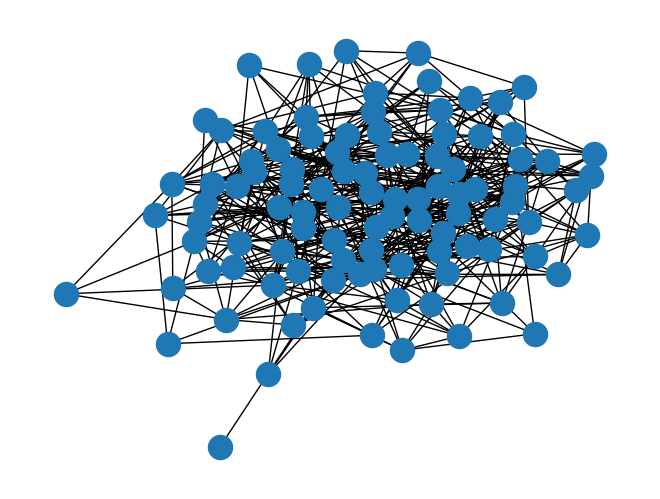

In [22]:
nx.draw(G)

By default, this layout is random. Let us now learn how to use <code>forceatlas2</code> to beautify the layout.

In [37]:
pos = nx.random_layout(G)
pos = forceatlas2.forceatlas2_networkx_layout(G, pos, niter=1000)
nx.draw(G, pos)

AttributeError: module 'forceatlas2.fa2.forceatlas2' has no attribute 'forceatlas2_networkx_layout'

We can use built-in functions in <code>networkx</code> to compute the average degree $\langle k \rangle$, as the total number of links, divided by the total number of nodes.

In [ ]:
G.number_of_edges()/G.number_of_nodes()

Many other network characteristics can be computed easily in <code>networkx</code>.

## Simulating SIR Dynamics on Random Network

Next, we learn how to simulate the SIR dynamics on the Erdos-Renyi network.

At the start of the simulation, let us pick a random node to be infected.

In [ ]:
import numpy as np
I = []
I.append(np.random.randint(N))

We assume that the rest of the nodes are susceptible.

In [ ]:
S = [ i for i in range(N) ]

In [ ]:
S = list(set(S) - set(I))

We also initialize the list of recovered nodes.

In [ ]:
R = []

Before running the simulation, let us set the infection rate to be <code>beta = 0.25</code>, i.e., every time step, there is a 25% chance for an infected node to infect a susceptible neighbour. Let us also set the recovery rate to be <code>gamma = 0.1</code>, i.e., an infected node takes on average 10 time steps to recover.

In [ ]:
beta = 0.25
gamma = 0.1

Let us go through one turn of this simulation first, before we automate the rest.

First, let us learn how to visualize the epidemic simulation, by plotting the links and nodes separately, using red for infected nodes, blue for susceptible nodes, and green for recovered nodes.

In [ ]:
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

Next, let us check the neighbors of the infected nodes, and if they are susceptible nodes, infect them with a probability of $\beta = 0.25$.

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)

In the above code, we need not worry about a node $j$ that is a neighbor of node $i$ and also of node $i'$. If $j$ is infected by $i$, it would be removed from <code>Snew</code>. Therefore, when we come around to $j$ again when we go through the neighbors of $i'$, $j$ would no longer be in <code>Snew</code>.

After allowing the seed node to infect some of its neighbors, let us now allow some of the infected nodes to recover, with probability $\gamma = 0.1$.

In [ ]:
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)

Before we run more steps of the simulation, let us plot the network again.

In [ ]:
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

One full simulation step would be:

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)

In [ ]:
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

In [ ]:
# make copies of S and I
Snew = list(S)
Inew = list(I)
# infect susceptible neighbors of infected nodes
# go through all infected nodes
for i in I:
    # go through all neighbors of infected nodes
    for j in G.neighbors(i):
        # check if neighbor is in list of susceptible nodes
        if j in Snew:
            if np.random.rand() < beta:
                # add j to new list of infected nodes
                Inew.append(j)
                # remove j from new list of susceptible nodes
                Snew.remove(j)
# update lists
S = list(Snew)
I = list(Inew)
# make copy of I
Inew = list(I)
# go through all infected nodes
for i in I:
    # node i recovers with probability gamma = 0.1
    if np.random.rand() < gamma:
        Inew.remove(i)
        R.append(i)
# update list
I = list(Inew)
# draw edges first
for e in G.edges():
    i = e[0]
    j = e[1]
    plt.plot([pos[i][0], pos[j][0]],[pos[i][1], pos[j][1]], 'k', linewidth=2)
# draw susceptible nodes
for i in S:
    r = pos[i]
    plt.plot(r[0], r[1], 'bo', markersize=10)
# draw infected nodes
for i in I:
    r = pos[i]
    plt.plot(r[0], r[1], 'ro', markersize=10)
# draw recovered nodes
for i in R:
    r = pos[i]
    plt.plot(r[0], r[1], 'go', markersize=10)
# do not show axes
plt.axis('off')
plt.show()

## The Effective Reproductive Number

The SIR equation can be solved exactly, to give
\begin{equation}
I(t) = I_0 \exp\left[(R_{\text{eff}} - 1)\gamma t\right].
\end{equation}
From this equation, we see that if $R_{\text{eff}} < 1$, the number of infected cases would decay exponentially. $R_{\text{eff}}$ is called the <em>effective reproductive number</em>.

Play around with $\beta$ keeping $\gamma$ constant, to simulate a situation in which $R_{\text{eff}} < 1$.

## Duration of Infectious Period

In the SIR equation, infected individuals are assumed to recover at a rate of $\gamma I(t)$. When we implement this probabilistically, we will find a number of infected individuals recovering after one time step. In the real world, this almost never happens.

Instead of letting the infected individuals recover over a distribution of infectious durations, we can set a fixed duration for the infectious period. After this period, the infected individual recovers.

Modify the network simulation to allow for a fixed duration for the infectious period.

## SEIR Dynamics on Network

We described the SEIR equations earlier, so that exposed (E) individuals become infectious (I) after a certain incubation period.

Modify the network simulation you have so far, so that exposed individuals remained uninfectious for $\tau_1$ time steps, while infected individuals remained infectious for $\tau_2$ time steps.

## SIR Dynamics on a Scale-Free Network

So far we have simulated SIR dynamics on a Erdos-Renyi network, also called a random network.

Another popular model is the Barabasi-Albert network, also called a scale-free network. This can be generated using the <code>networkx</code> built-in function <code>barabasi_albert_graph(n, m[, seed, …])</code>.

Are there any noticeable differences simulating SIR dynamics on a random network and a scale-free network?